In [248]:
import cv2
import numpy as np
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt

In [249]:
cr7 = cv2.imread("cr7.jpg")
chica = cv2.imread("chica.jpg")

### Modelo por defecto que hay que descargar

In [250]:
# !wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

## Funciones de usuario

In [251]:
def obtener_coordenadas(face_landmarks_proto):
  """
  Extrae las coordenadas de los puntos de referencia faciales de un buffer de protocolo.

  Args:
    face_landmarks_proto: Un buffer de protocolo que contiene los puntos de referencia faciales.

  Returns:
    Una lista de listas que contiene las coordenadas (x, y, z) de cada punto de referencia.
  """

  coordenadas = []
  for landmark in face_landmarks_proto.landmark:
    coordenadas.append([landmark.x, landmark.y])
  
  return coordenadas

## Funciones mediapipe

In [252]:
def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    # Saco las coordenadas de los puntos de la cara con la función definida anteriormente
    coordenadas = obtener_coordenadas(face_landmarks_proto)
    coordenadas = np.array(coordenadas) * np.array([annotated_image.shape[0], annotated_image.shape[1]])

    for coordenada in coordenadas:
      print(coordenada)

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image, coordenadas

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

## Coordenadas de los puntos de la cara de Cristiano Ronaldo

[240.55433273 178.00395191]
[237.64871061 152.58659422]
[238.56323957 160.57047248]
[231.46238923 132.89578259]
[237.32082546 145.74302733]
[237.05384135 137.89017498]
[236.90465093 119.2195043 ]
[192.28769839 119.0507412 ]
[236.33995652 103.78390551]
[236.01293564  94.98440474]
[234.90734398  62.99497187]
[240.68149924 179.96968329]
[240.79462886 181.57362938]
[240.68719149 182.64220655]
[241.23477936 194.43836808]
[241.24722183 196.58404589]
[241.34726822 199.61127639]
[241.23580754 202.91680098]
[241.14817381 211.51131392]
[237.98836768 156.79104626]
[232.31208324 157.64728189]
[166.63269699  97.96179831]
[209.51914787 123.20140004]
[202.93857157 124.21806157]
[196.66619599 124.58464503]
[189.11954761 122.05119431]
[215.23861587 121.60938978]
[197.48023152 105.18588126]
[205.66433668 105.57286441]
[190.51018357 107.00362921]
[186.42517924 110.09756476]
[183.17018449 126.78322196]
[213.89620006 223.13943505]
[190.11569023 117.71910638]
[164.75909948 127.40954757]
[175.21885037 123.04

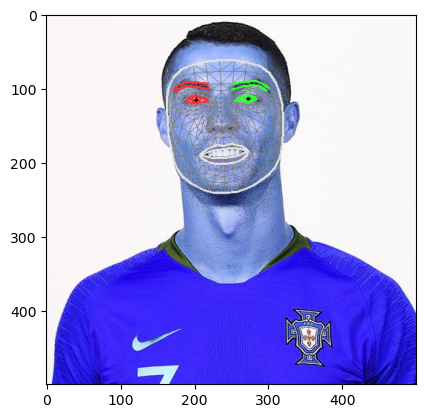

In [253]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

coordenadas = []

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("cr7.jpg")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image, coordenadas = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

## Coordenadas de los puntos de la cara de la chica

[205.56250215 177.34268308]
[203.28657329 163.84483874]
[204.35960591 166.27642512]
[199.48944449 145.77800035]
[203.06041837 159.24918652]
[203.20343971 151.90422535]
[204.20095325 132.47717917]
[170.89347541 123.28337878]
[204.4081986  117.53885448]
[204.43512499 110.40666699]
[205.01679182  80.24187386]
[205.69784939 179.0933758 ]
[205.91980219 180.71493506]
[206.00266755 181.92318082]
[205.97450435 182.02216923]
[205.94182611 184.77006257]
[206.06094599 188.03063035]
[206.18388057 191.06119871]
[206.52079582 195.00383735]
[203.61976326 165.53272307]
[199.45447147 164.36506808]
[156.27241135  96.3562876 ]
[185.2953434  129.58547473]
[180.38858473 129.78382409]
[175.5413413  129.29034233]
[169.64446008 124.63968247]
[189.16204572 128.92052531]
[176.55144632 112.67311871]
[182.59891868 114.15658891]
[171.43751681 113.16618323]
[168.49070787 115.05404115]
[166.27709568 127.63875723]
[189.98897076 199.28574562]
[169.37461495 120.86892128]
[155.17702699 119.55207586]
[161.32946312 122.25

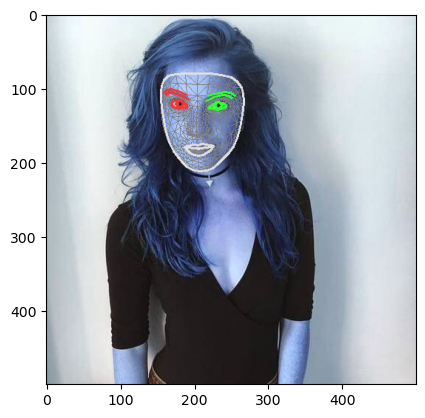

In [254]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

coordenadas_chica = []

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image_chica = mp.Image.create_from_file("chica.jpg")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image_chica)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image, coordenadas_chica = draw_landmarks_on_image(image_chica.numpy_view(), detection_result)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

## Puntos de referencia de los triángulos

In [255]:
from indices_puntos import MY_FACEMESH_TESSELATION

tri_list = [[MY_FACEMESH_TESSELATION[i], MY_FACEMESH_TESSELATION[i+1], MY_FACEMESH_TESSELATION[i+2]] for i in range(0, len(MY_FACEMESH_TESSELATION), 3)]

# Obtención de triángulos
lista_set = []
for x in tri_list:    
    triangulo = []
    for i in x:
        for h in i:
            triangulo.append(h)
    lista_set.append(list(set(triangulo)))
lista_set


[[34, 139, 127],
 [0, 11, 37],
 [232, 120, 231],
 [72, 37, 39],
 [128, 121, 47],
 [232, 121, 128],
 [104, 67, 69],
 [171, 148, 175],
 [50, 101, 118],
 [40, 73, 39],
 [9, 108, 151],
 [48, 115, 131],
 [194, 211, 204],
 [40, 185, 74],
 [80, 42, 183],
 [40, 186, 92],
 [118, 229, 230],
 [202, 212, 214],
 [17, 18, 83],
 [146, 76, 61],
 [160, 29, 30],
 [56, 157, 173],
 [194, 106, 204],
 [192, 214, 135],
 [98, 203, 165],
 [68, 21, 71],
 [51, 4, 45],
 [144, 24, 23],
 [146, 91, 77],
 [50, 187, 205],
 [200, 201, 18],
 [106, 91, 182],
 [90, 91, 181],
 [17, 84, 85],
 [203, 36, 206],
 [140, 171, 148],
 [40, 92, 39],
 [193, 244, 189],
 [28, 158, 159],
 [161, 246, 247],
 [196, 3, 236],
 [104, 68, 54],
 [168, 193, 8],
 [228, 117, 31],
 [193, 189, 55],
 [97, 98, 99],
 [100, 126, 47],
 [218, 166, 79],
 [26, 154, 155],
 [209, 131, 49],
 [136, 150, 135],
 [217, 126, 47],
 [52, 53, 223],
 [51, 45, 134],
 [170, 211, 140],
 [67, 108, 69],
 [91, 106, 43],
 [120, 230, 119],
 [226, 247, 130],
 [52, 53, 63],
 [24

## Conversión de las coordenadas de cada punto a diccionario

### Cristiano Ronaldo

In [256]:

coordenadas_originales_cr7 = {}

idx = -1
for i in coordenadas:
    lista_idx = []
    x, y = 0, 0
    idx += 1
    x = i[0]
    y = i[1]
    lista_idx.append(x)
    lista_idx.append(y)
    coordenadas_originales_cr7[idx] = lista_idx

coordenadas_originales_cr7


{0: [240.5543327331543, 178.0039519071579],
 1: [237.64871060848236, 152.58659422397614],
 2: [238.56323957443237, 160.57047247886658],
 3: [231.46238923072815, 132.89578258991241],
 4: [237.32082545757294, 145.74302732944489],
 5: [237.05384135246277, 137.89017498493195],
 6: [236.90465092658997, 119.21950429677963],
 7: [192.28769838809967, 119.05074119567871],
 8: [236.33995652198792, 103.78390550613403],
 9: [236.01293563842773, 94.98440474271774],
 10: [234.9073439836502, 62.99497187137604],
 11: [240.6814992427826, 179.9696832895279],
 12: [240.79462885856628, 181.57362937927246],
 13: [240.68719148635864, 182.64220654964447],
 14: [241.23477935791016, 194.4383680820465],
 15: [241.24722182750702, 196.5840458869934],
 16: [241.3472682237625, 199.61127638816833],
 17: [241.23580753803253, 202.91680097579956],
 18: [241.1481738090515, 211.51131391525269],
 19: [237.98836767673492, 156.79104626178741],
 20: [232.31208324432373, 157.6472818851471],
 21: [166.63269698619843, 97.961798

### Chica

In [257]:

coordenadas_originales_chica = {}

idx = -1
for i in coordenadas_chica:
    lista_idx = []
    x, y = 0, 0
    idx += 1
    x = i[0]
    y = i[1]
    lista_idx.append(x)
    lista_idx.append(y)
    coordenadas_originales_chica[idx] = lista_idx

coordenadas_originales_chica


{0: [205.5625021457672, 177.34268307685852],
 1: [203.2865732908249, 163.84483873844147],
 2: [204.35960590839386, 166.27642512321472],
 3: [199.48944449424744, 145.77800035476685],
 4: [203.06041836738586, 159.2491865158081],
 5: [203.2034397125244, 151.90422534942627],
 6: [204.20095324516296, 132.47717916965485],
 7: [170.89347541332245, 123.28337877988815],
 8: [204.408198595047, 117.53885447978973],
 9: [204.43512499332428, 110.40666699409485],
 10: [205.01679182052612, 80.24187386035919],
 11: [205.69784939289093, 179.0933758020401],
 12: [205.9198021888733, 180.7149350643158],
 13: [206.00266754627228, 181.92318081855774],
 14: [205.9745043516159, 182.02216923236847],
 15: [205.9418261051178, 184.77006256580353],
 16: [206.06094598770142, 188.03063035011292],
 17: [206.18388056755066, 191.06119871139526],
 18: [206.52079582214355, 195.00383734703064],
 19: [203.61976325511932, 165.53272306919098],
 20: [199.45447146892548, 164.36506807804108],
 21: [156.27241134643555, 96.356287

## Dibujar líneas

### Cristiano Ronaldo

In [258]:
tri_list[0]
for i in tri_list:
    #línea
    seg1 = i[0] #  (127, 34)
    seg2 = i[1] #  (34, 139)
    seg3 = i[2] #  (139, 127)

    pt1 = seg1[0]
    pt2 = seg2[0]
    pt3 = seg3[0]

    for h in i:
        cv2.line(cr7, pt1=(int(coordenadas_originales_cr7[pt1][0]), int(coordenadas_originales_cr7[pt1][1])),pt2=(int(coordenadas_originales_cr7[pt2][0]), int(coordenadas_originales_cr7[pt2][1])),color=(255,0,0))
        cv2.line(cr7, pt1=(int(coordenadas_originales_cr7[pt2][0]), int(coordenadas_originales_cr7[pt2][1])),pt2=(int(coordenadas_originales_cr7[pt3][0]), int(coordenadas_originales_cr7[pt3][1])),color=(255,0,0))
        cv2.line(cr7, pt1=(int(coordenadas_originales_cr7[pt3][0]), int(coordenadas_originales_cr7[pt3][1])),pt2=(int(coordenadas_originales_cr7[pt1][0]), int(coordenadas_originales_cr7[pt1][1])),color=(255,0,0))



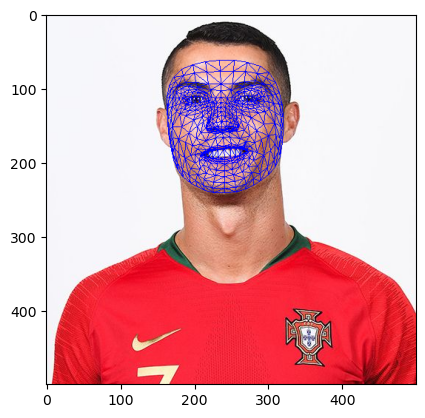

In [259]:
plt.imshow(cv2.cvtColor(cr7,cv2.COLOR_BGR2RGB))

### Chica

In [260]:
tri_list[0]
for i in tri_list:
    #línea
    seg1 = i[0] #  (127, 34)
    seg2 = i[1] #  (34, 139)
    seg3 = i[2] #  (139, 127)

    pt1 = seg1[0]
    pt2 = seg2[0]
    pt3 = seg3[0]

    for h in i:
        cv2.line(chica, pt1=(int(coordenadas_originales_chica[pt1][0]), int(coordenadas_originales_chica[pt1][1])),pt2=(int(coordenadas_originales_chica[pt2][0]), int(coordenadas_originales_chica[pt2][1])),color=(255,0,0))
        cv2.line(chica, pt1=(int(coordenadas_originales_chica[pt2][0]), int(coordenadas_originales_chica[pt2][1])),pt2=(int(coordenadas_originales_chica[pt3][0]), int(coordenadas_originales_chica[pt3][1])),color=(255,0,0))
        cv2.line(chica, pt1=(int(coordenadas_originales_chica[pt3][0]), int(coordenadas_originales_chica[pt3][1])),pt2=(int(coordenadas_originales_chica[pt1][0]), int(coordenadas_originales_chica[pt1][1])),color=(255,0,0))



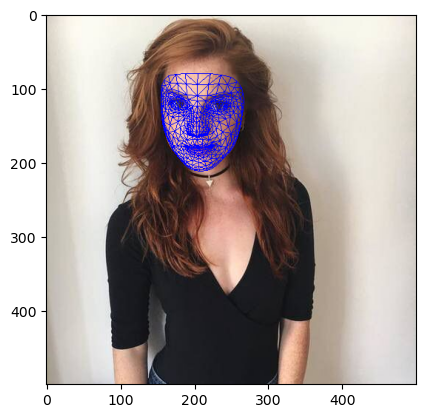

In [261]:
plt.imshow(cv2.cvtColor(chica,cv2.COLOR_BGR2RGB))

In [262]:
lista_set

[[34, 139, 127],
 [0, 11, 37],
 [232, 120, 231],
 [72, 37, 39],
 [128, 121, 47],
 [232, 121, 128],
 [104, 67, 69],
 [171, 148, 175],
 [50, 101, 118],
 [40, 73, 39],
 [9, 108, 151],
 [48, 115, 131],
 [194, 211, 204],
 [40, 185, 74],
 [80, 42, 183],
 [40, 186, 92],
 [118, 229, 230],
 [202, 212, 214],
 [17, 18, 83],
 [146, 76, 61],
 [160, 29, 30],
 [56, 157, 173],
 [194, 106, 204],
 [192, 214, 135],
 [98, 203, 165],
 [68, 21, 71],
 [51, 4, 45],
 [144, 24, 23],
 [146, 91, 77],
 [50, 187, 205],
 [200, 201, 18],
 [106, 91, 182],
 [90, 91, 181],
 [17, 84, 85],
 [203, 36, 206],
 [140, 171, 148],
 [40, 92, 39],
 [193, 244, 189],
 [28, 158, 159],
 [161, 246, 247],
 [196, 3, 236],
 [104, 68, 54],
 [168, 193, 8],
 [228, 117, 31],
 [193, 189, 55],
 [97, 98, 99],
 [100, 126, 47],
 [218, 166, 79],
 [26, 154, 155],
 [209, 131, 49],
 [136, 150, 135],
 [217, 126, 47],
 [52, 53, 223],
 [51, 45, 134],
 [170, 211, 140],
 [67, 108, 69],
 [91, 106, 43],
 [120, 230, 119],
 [226, 247, 130],
 [52, 53, 63],
 [24